## Rozwiązywanie równań różniczkowych metodami algebry liniowej 

#### Zadanie 1
Zaimplementuj metodą iteracyjną rozwiązywania układów równań Czebyszewa. 

In [1]:
import numpy as np
from scipy.linalg import norm
import math
import matplotlib.pyplot as plt

def chebyshev_method(A, b, iter_num, l_max, l_min, size = 10, eps = 1e-15):
    d = (l_max + l_min) / 2
    c = (l_max - l_min) / 2
    preCond = np.identity(2)
    x = np.zeros(size**2)
    r = b - np.matmul(A, x)
    iter_count = 0

    for i in range(1, iter_num + 1):
        iter_count = iter_count + 1
        z = np.linalg.solve(A, r)
        alpha = 1
        if i == 1:
            p = z
            alpha = 1 / d
        elif (i == 2):
            beta = (1 / 2) * (c * alpha) ** 2
            alpha = 1 / (d - beta / alpha)
            p = z + beta * p
        else:
            beta = (c * alpha / 2) ** 2
            alpha = 1 / (d - beta / alpha)
            p = z + beta * p
        x = x + alpha * p
        r = np.matmul(A, x)
        r = b - r
        if norm(r) < eps:
            return [x, iter_count]
    return [x, iter_count]

#### Zadanie 2
Zapoznaj się z prezentacją dr Rycerz o sposobie rozwiązywaniu równania różniczkowego Poissona dla dwóch wymiarów (metoda różnic skończonych).

Rozwiąż równanie Poissona w przestrzeni 2D. Funkcja rozkładu źródeł ma postać: $$\rho(x,y) = \frac{x+y}{2}$$    
Obliczenia dokonujemy w obszarze dwuwymiarowym: $$\Omega = [0,10] \times [0,10]$$ Siatkę proszę dobrać samodzielnie tak by obliczenie nie było zbyt długie (na podstawie wcześniejszy testów metod iteracyjnych).   
Warunki brzegowe jednorodne Dirichleta: 0 na brzegach. 

Przedstaw sposób konstrukcji układu równań w metodzie różnic skończonych dla tego równiania. Przedstaw rozwiązanie graficznie. 

Postać równania do rozwiązania:
$$\triangledown ^{2}*\varphi (x,y) = -\rho (x,y)$$

Po rozpisaniu operatora Laplace'a uyskujemy następujące równanie:

$$\frac{\partial^2 \varphi (x,y) }{\partial x^2} + \frac{\partial^2\varphi x,y }{\partial y^2} = -\rho (x,y) \quad (*)$$

Postać funkcji rozkładu źródeł:

$$\rho(x,y) = \frac{x+y}{2}$$ 

Czyli:

$$\frac{\partial^2 \varphi (x,y) }{\partial x^2} + \frac{\partial^2\varphi x,y }{\partial y^2}= \frac{x+y}{2}$$ 

Teraz należy zająć się jendorodnymi warunkami brzegowymi Dirichleta - 0 na brzegach:

$$\rho(x,0)=0$$
$$\rho(0,y)=0$$
$$\rho(x,n+1)=0$$
$$\rho(n+1,y)=0$$

Następnie, aby przybliżyć pochodne za pomoca różnić skończonych wprowadzam siatkę o rozmiarze 10x10:

$$\varphi _{i, j} = \varphi (x_{i}, y_{j}), i = 1, ...10 \quad j =1, ...10$$, gdzie $$(x_{i}, y_{j})\ oznaczają\ punkty\ na\ siatce$$ 

Zakładamy, że:
$$h = x_{i+1}-x_{i} = y_{j+1}-y_{j}=1 $$ oznaczają odstępy między punktami na siatce

Następnym krokiem jest policzenie odpowiednich pochodnych:
$$\frac{\partial \varphi _{i, j}}{\partial x} = \frac{\varphi _{i+1, j} - \varphi_{i-1, j}}{2h} + O(h^{2}) \quad(1)\\ 
\frac{\partial^2\varphi _{i, j} }{\partial x^2} = \frac{\varphi _{i+1, j} -2\varphi _{i,j}+ \varphi_{i-1, j}}{h^{2}} + O(h^{2}) \quad(2)\\  
\frac{\partial \varphi _{i, j}}{\partial y} = \frac{\varphi _{i, j+1} - \varphi_{i, j-1}}{2h} + O(h^{2}) \quad(3)\\ 
\frac{\partial^2\varphi _{i, j} }{\partial y^2} = \frac{\varphi _{i, j+1} -2\varphi _{i,j}+ \varphi_{i, j-1}}{h^{2}} + O(h^{2}) \quad(4)$$

Po wyprowadzeniu wzorów na pochodne, podstawiamy równanie oznaczone (2) i (4) do równania (*) i otrzymujemy:

$$\frac{\varphi (x_{i}, y_{j-1}) + \varphi (x_{i-1}, y_{j}) - 4\varphi (x_{i}, y_{j}) + \varphi (x_{i+1}, y_{j}) + \varphi (x_{i}, y_{j+1})}{h^{2}} = -\rho (x_{i}, y_{j})$$


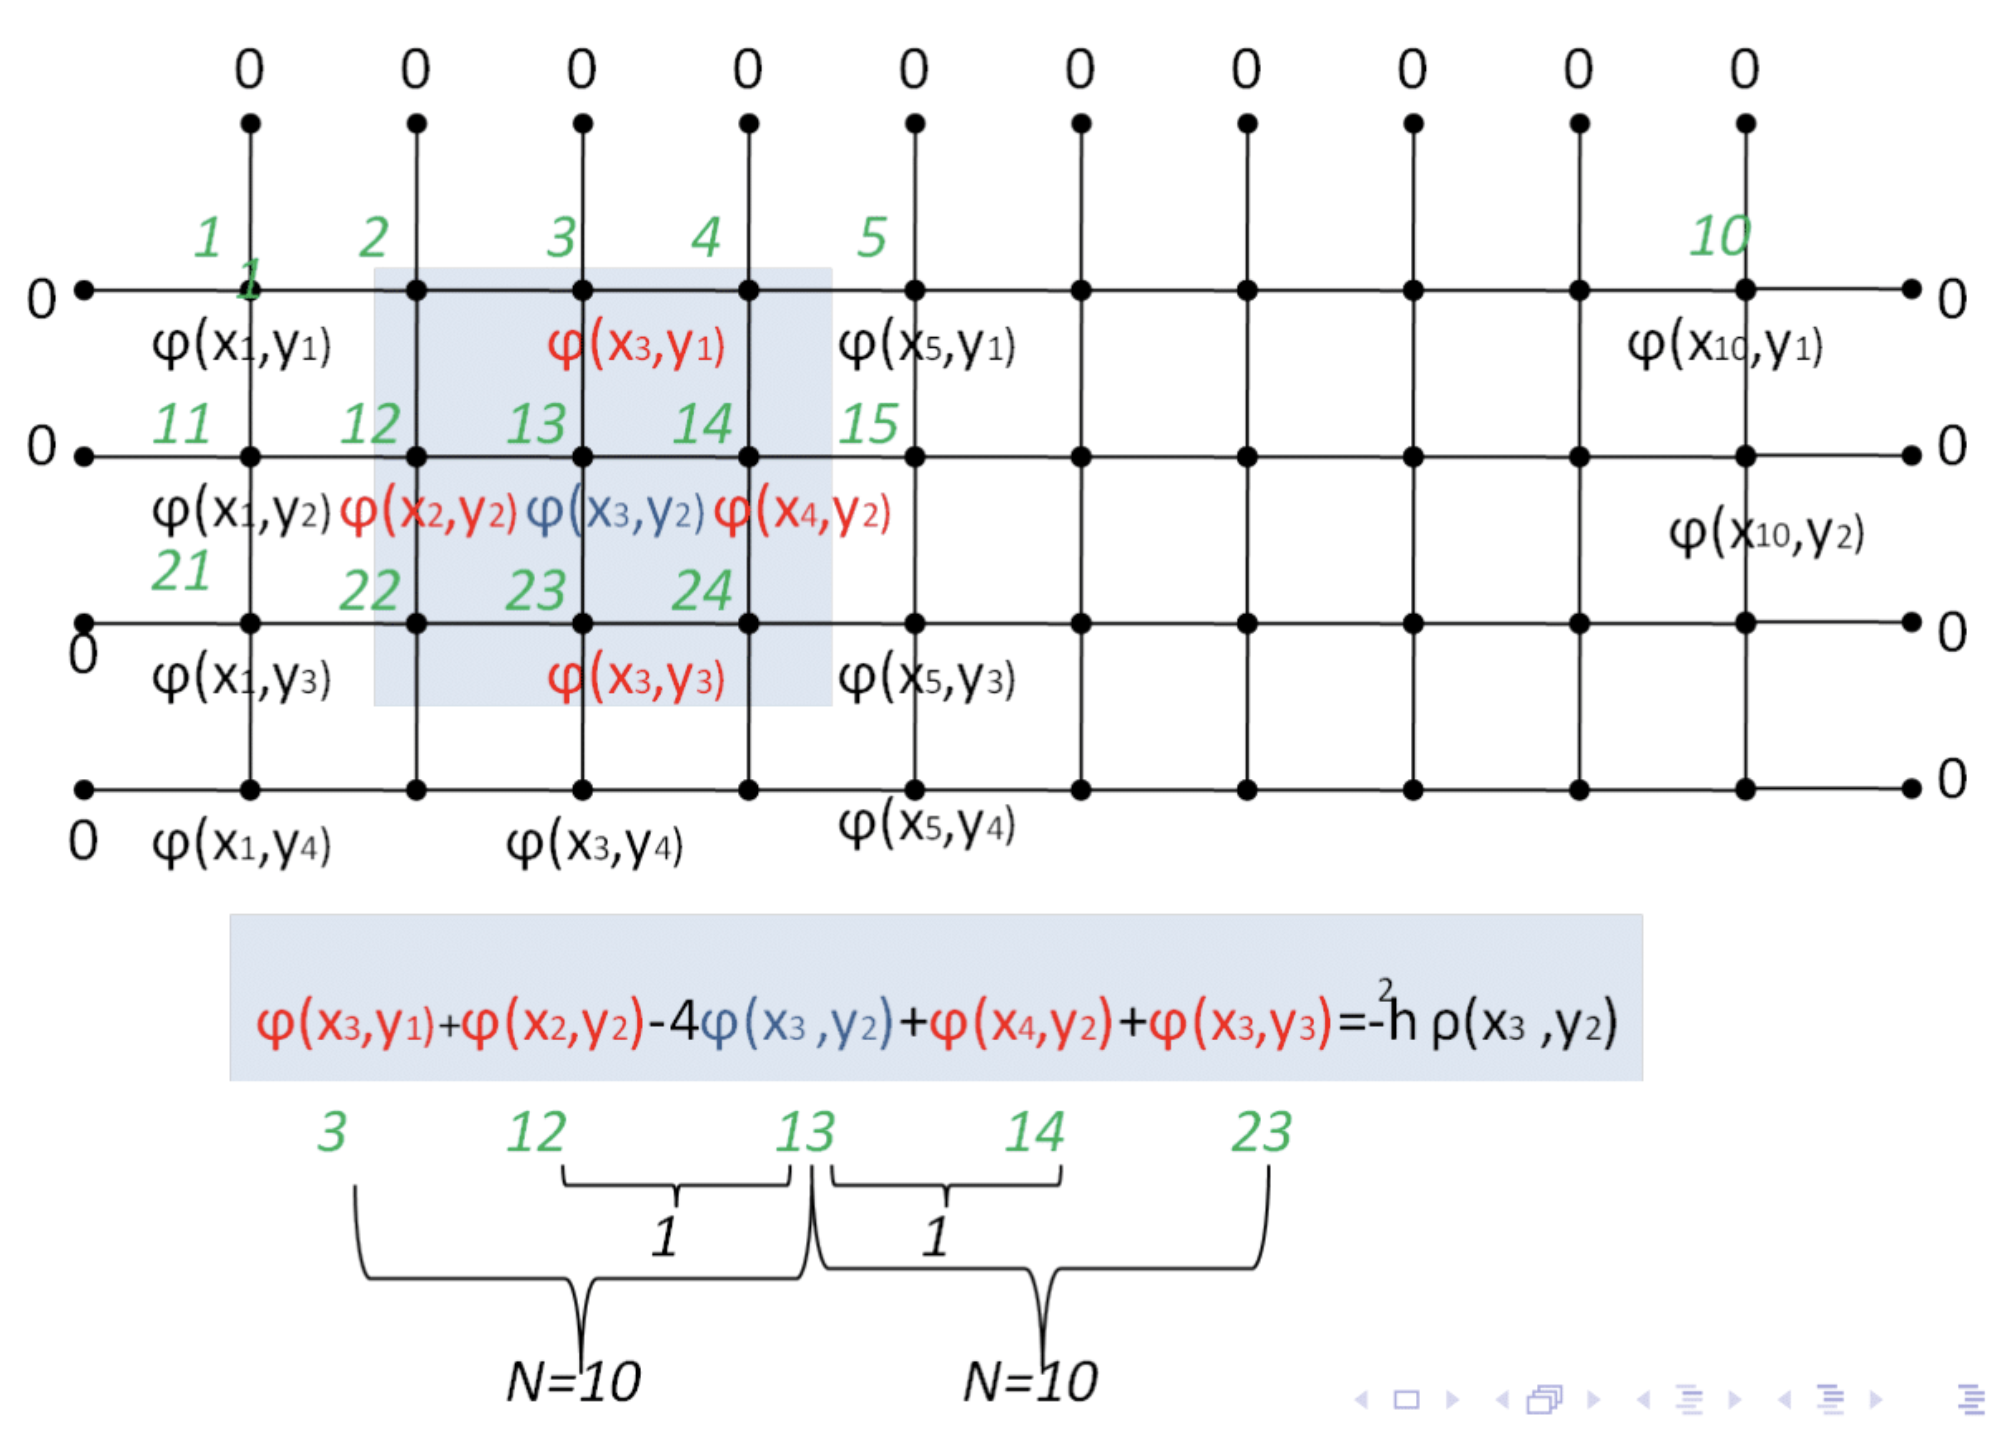

#### Zadanie 3
Zastosuj do otrzymanego układu równań metody Gaussa-Seidla, SOR i Czebyszewa. Porównaj zbieżność tych metod. 

In [ ]:
import numpy as np 

def Gauss_Seidel_method(A, B, max_iterations=500, epsilon=1e-10):
    DL = np.tril(A)
    U = A - DL
    DL_inv = np.linalg.inv(DL)
    X = np.zeros(len(B))
    for i in range(max_iterations):
        X_new = np.zeros(len(X))
        X_new = np.dot(DL_inv, B - np.dot(U, X))
        if np.linalg.norm(X_new - X) < epsilon:
            return X_new
        X = X_new
    return X

In [ ]:
import numpy  as np

def sor_solver(A, B, max_iterations = 500, omega = 0.8,  epsilon= 1e-10):
    D = np.diag(np.diag(A))
    L = np.tril(A - D)
    U = A - D - L
    D_inv = np.linalg.inv(D)
    D_inv_omega = np.dot(D_inv, omega)
    X = np.zeros(len(B))
    for i in range(max_iterations):
        X_new = np.zeros(len(X))
        X_new = np.add(np.dot((1- omega), X), np.dot(D_inv_omega, B - np.dot(L, X) - np.dot(U, X)))
        if np.linalg.norm(X_new - X) < epsilon:
            return X_new
        X = X_new
    return X